## Visualize the Image

Run the first cell to download the image to the running directory.
Then run the second cell to display the image.

In [27]:
import urllib.request
import json

fileObj = open("../annotations/stuff_val2017.json", "r")
data = json.load(fileObj)

imageURL = data["images"][0]["coco_url"]
urllib.request.urlretrieve(imageURL, "imagefile.png")

('imagefile.png', <http.client.HTTPMessage at 0x1d12beb9c00>)

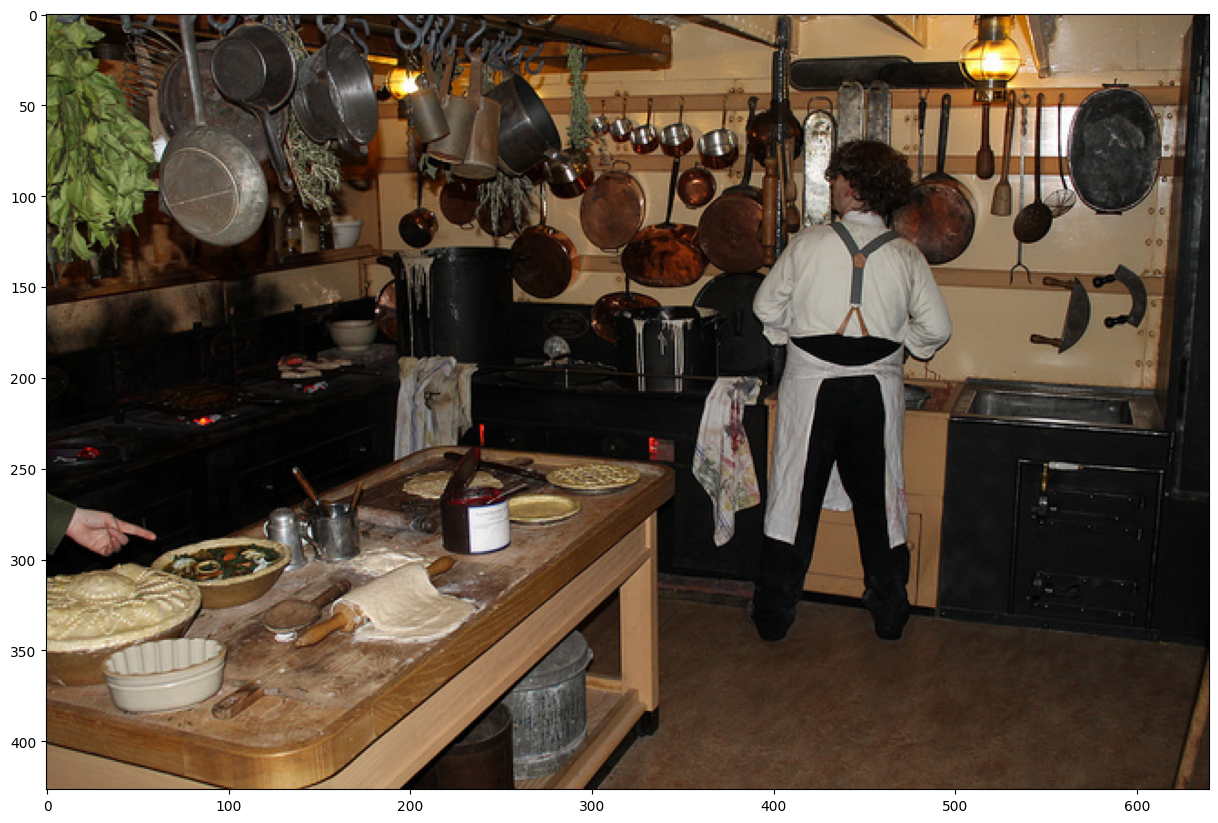

In [28]:
from PIL import Image
import matplotlib.pyplot as plt
from numpy import asarray

plt.rcParams['figure.figsize'] = (15, 15)

img = Image.open('imagefile.png')
numpydata = asarray(img)

imgplot = plt.imshow(numpydata)
plt.show()



### Load Annotations from COCO

The following cell loads the annotations from the COCO dataset.
The annotations are stored in a dictionary.
The keys are the image ids.

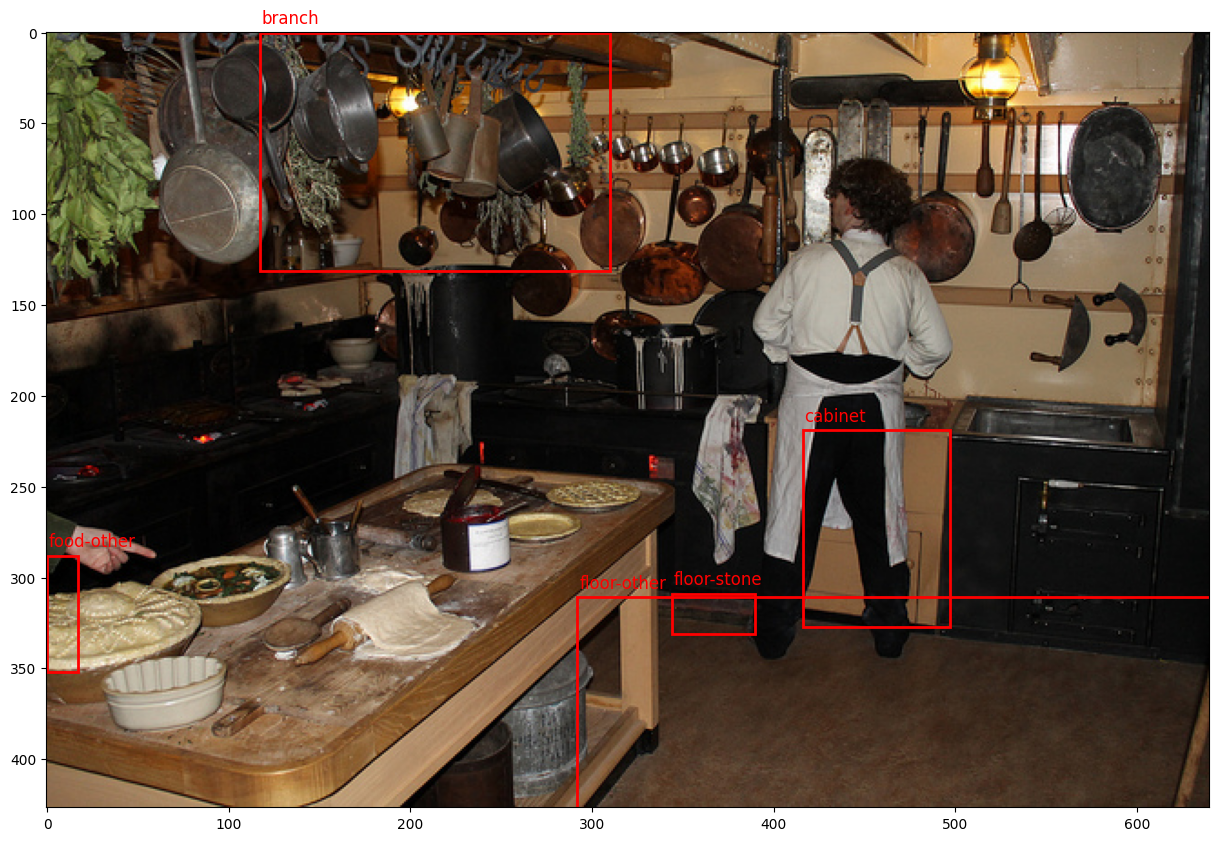

In [32]:
import json
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from numpy import asarray


img = Image.open('imagefile.png')
numpydata = asarray(img)

fig, ax = plt.subplots()

fileObj = open("../annotations/stuff_val2017.json", "r")
data = json.load(fileObj)

# Get the first annotation

array = []
count = 0
for i in range(0, len(data["annotations"])):
    
    if data["annotations"][i]["image_id"] == data["images"][0]["id"]:
        array.append(data["annotations"][i])
        count += 1
        
        if count == 5:
            break

for xarray in array:
    bbox = xarray['bbox']
    x = bbox[0]
    y = bbox[1]
    w = bbox[2]
    h = bbox[3]
    categoryid = xarray['category_id']
    categoryname = data['categories'][categoryid - 92]['name']
    plt.text(x+1, y-5, categoryname, fontsize=12, color='red')
    rectangle = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rectangle)
    

ax.imshow(numpydata)
plt.show()

